# STEM simulations with the PRISM algorithm

In [10]:
%load_ext autoreload
%autoreload 2
from ase.build import mx2
from ase.io import read
import numpy as np

from tensorwaves.waves import PrismWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Quick Simulation

In [11]:
atoms = read('../data/mos2.traj')

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [12]:
waves = PrismWaves(energy=80e3, cutoff=.02, interpolation=2, sampling=.1)

S = waves.multislice(atoms)

detector = RingDetector(inner=.05, outer=.2)

scan = S.gridscan(start=(0,0), end=(cell[0] / 2, cell[1] / 2), sampling=.2, detectors=detector)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 837/837 


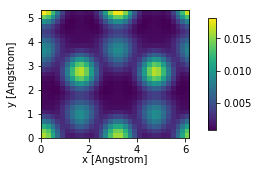

In [13]:
image = scan.image()

image.show()

## Step-by-step Simulation

### Set up unit cell

In [14]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=1, axis=2)

cell = np.diag(atoms.get_cell())

from ase.io import write

write('MoS2.traj',atoms)


print(cell)

[12.72       11.01584314  5.19      ]


### Create Potential

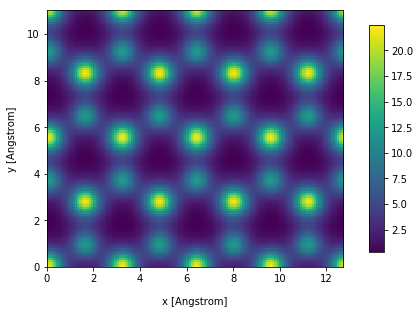

In [15]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Create Scattering Matrix

In [16]:
waves = PrismWaves(energy=80e3, cutoff=.02, interpolation=1, gpts=potential.gpts, extent=potential.extent)
S = waves.get_scattering_matrix()

S = S.multislice(potential)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 10/10 


### Set Aberrations & Examine Probe

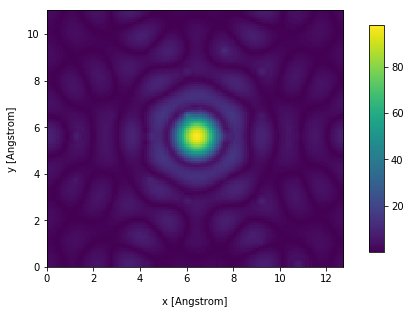

In [17]:
S.position = (2,0)

S.aberrations.parametrization.C10 = 10
S.aperture.radius = .02

probe = S.get_probe()
probe.show(fig_scale=2, display_space='direct')

In [18]:
S.aberrations.parametrization.defocus

10

### Create Detector

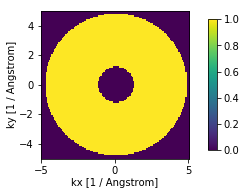

In [19]:
detector = RingDetector(inner=.05, outer=.2, gpts=probe.gpts, extent=probe.extent, energy=probe.energy)

detector.get_tensor().show(display_space='fourier')

### Perform Grid Scan 

In [21]:
start = (0,0)
end = (cell[0]/2, cell[1]/2)

scan = S.gridscan(start=(0,0), end=end, sampling=.2, detectors=detector)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 837/837 


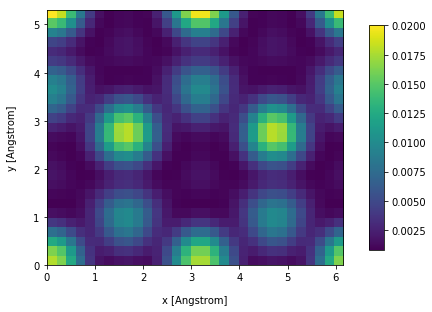

In [22]:
image = scan.image()
image.show(fig_scale=2)

In [23]:
image.numpy()

array([[[0.01784783, 0.01633027, 0.01247708, 0.00781928, 0.00389416,
         0.00157062, 0.00084234, 0.00109252, 0.0015714 , 0.00178053,
         0.00160703, 0.00124798, 0.00105911, 0.00141787, 0.00259598,
         0.0046069 , 0.00706548, 0.00919051, 0.01007295, 0.00917459,
         0.00680285, 0.00420926, 0.00311174, 0.00479718, 0.00929346,
         0.01515067, 0.02004967],
        [0.01631324, 0.01487041, 0.01129292, 0.00701949, 0.00346783,
         0.00140836, 0.00079301, 0.00102833, 0.00143206, 0.00157842,
         0.00139493, 0.0010691 , 0.00090686, 0.00122713, 0.00227102,
         0.0040721 , 0.00631293, 0.00829857, 0.00918284, 0.0084313 ,
         0.00628483, 0.00387937, 0.00281565, 0.00431586, 0.00843147,
         0.01382337, 0.01833001],
        [0.01236827, 0.01116293, 0.00835726, 0.0051302 , 0.00256956,
         0.00118099, 0.00081502, 0.0009601 , 0.00113612, 0.00112685,
         0.00096983, 0.00081364, 0.0008068 , 0.00108516, 0.0017887 ,
         0.0029994 , 0.00459055, 0.